In [1]:
print("Hello PPF&SMC")

Hello PPF&SMC


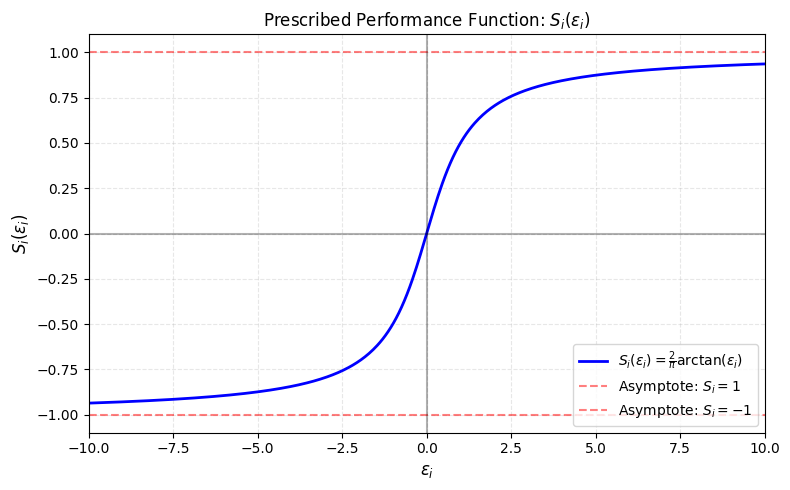

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 定义函数
def S(epsilon):
    return (2 / np.pi) * np.arctan(epsilon)

# 生成数据点
epsilon = np.linspace(-10, 10, 500)  # 范围[-10, 10]，500个点
s_values = S(epsilon)

# 绘制图像
plt.figure(figsize=(8, 5))
plt.plot(epsilon, s_values, label=r'$S_i(\varepsilon_i) = \frac{2}{\pi} \arctan(\varepsilon_i)$', color='blue', linewidth=2)
plt.axhline(y=1, color='red', linestyle='--', alpha=0.5, label='Asymptote: $S_i=1$')
plt.axhline(y=-1, color='red', linestyle='--', alpha=0.5, label='Asymptote: $S_i=-1$')
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)

# 标注和美化
plt.title('Prescribed Performance Function: $S_i(\\varepsilon_i)$', fontsize=12)
plt.xlabel('$\\varepsilon_i$', fontsize=12)
plt.ylabel('$S_i(\\varepsilon_i)$', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend(loc='lower right')
plt.xlim(-10, 10)
plt.ylim(-1.1, 1.1)
plt.tight_layout()
plt.show()


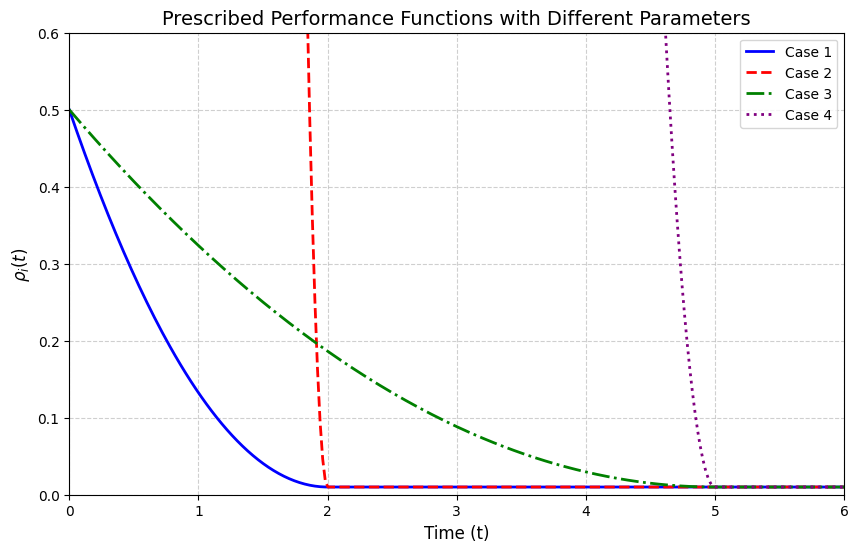

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# 定义时间范围
t = np.linspace(0, 20, 1000)  # 0~20秒，1000个点

# 定义4组不同的参数
params = [
    {"rho_0i": 0.5, "rho_infi": 0.01, "T_i": 2.0, "sigma_i": 2.0, "label": "Case 1", "color": "blue", "linestyle": "-"},
    {"rho_0i": 100, "rho_infi": 0.01, "T_i": 2.0, "sigma_i": 2.0, "label": "Case 2", "color": "red", "linestyle": "--"},
    {"rho_0i": 0.5, "rho_infi": 0.01, "T_i": 5.0, "sigma_i": 2.0, "label": "Case 3", "color": "green", "linestyle": "-."},
    {"rho_0i": 100, "rho_infi": 0.01, "T_i": 5.0, "sigma_i": 2.0, "label": "Case 4", "color": "purple", "linestyle": ":"},
]

plt.figure(figsize=(10, 6))

# 绘制每条曲线
for param in params:
    rho_i = np.piecewise(
        t,
        [t < param["T_i"], t >= param["T_i"]],
        [
            lambda t, p=param: (p["rho_0i"] - p["rho_infi"]) * (1 - t / p["T_i"]) ** p["sigma_i"] + p["rho_infi"],
            lambda t, p=param: p["rho_infi"] * np.ones_like(t),
        ]
    )
    plt.plot(t, rho_i, label=param["label"], color=param["color"], linestyle=param["linestyle"], linewidth=2)

# 添加图例、标签、网格等
plt.xlabel("Time (t)", fontsize=12)
plt.ylabel(r"$\rho_i(t)$", fontsize=12)
plt.title("Prescribed Performance Functions with Different Parameters", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(fontsize=10)
# 限制坐标范围
plt.xlim(0, 6)  # 只显示 t ∈ [0, 15]
plt.ylim(0, 0.6)   # 只显示 ρ_i(t) ∈ [0, 6]

plt.show()


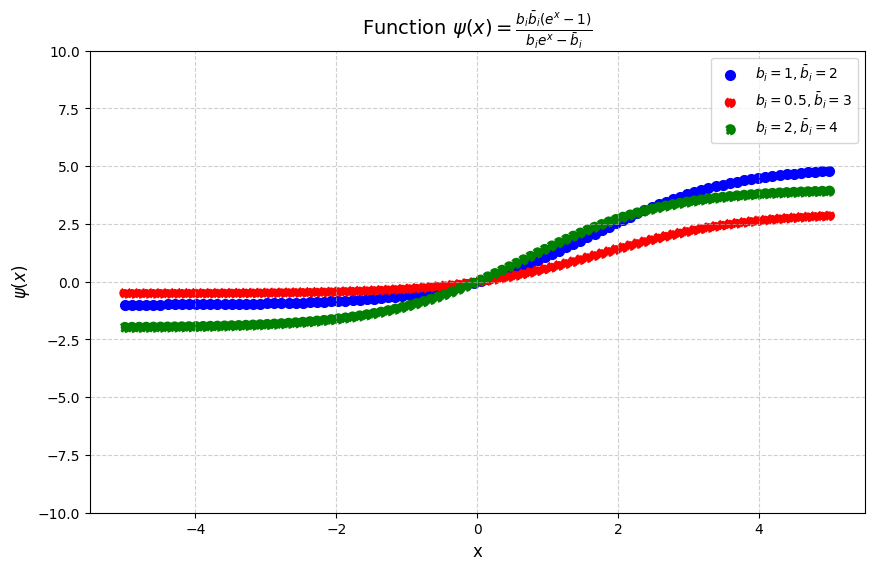

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def psi(x, b_under, b_over):
    """计算 ψ(x) = (b_under * b_over * (exp(x) - 1)) / (b_under * exp(x) - b_over)"""
    numerator = b_under * b_over * (np.exp(x) - 1)
    denominator = b_under * np.exp(x) - b_over
    return numerator / denominator

# 定义 x 的范围（避免分母为 0）
x = np.linspace(-5, 5, 100)  # 从 -5 到 5，1000 个点

# 定义不同的参数组合
params = [
    {"b_under": -1.0, "b_over": 5.0, "label": r"${b}_i=1, \bar{b}_i=2$", "color": "blue", "linestyle": "-"},
    {"b_under": -0.5, "b_over": 3.0, "label": r"${b}_i=0.5, \bar{b}_i=3$", "color": "red", "linestyle": "--"},
    {"b_under": -2.0, "b_over": 4.0, "label": r"${b}_i=2, \bar{b}_i=4$", "color": "green", "linestyle": "-."},
]

plt.figure(figsize=(10, 6))

# 绘制每条曲线
for param in params:
    y = psi(x, param["b_under"], param["b_over"])
    plt.scatter(x, y, label=param["label"], color=param["color"], linestyle=param["linestyle"], linewidth=2)

# 添加图例、标签、网格等
plt.xlabel("x", fontsize=12)
plt.ylabel(r"$\psi(x)$", fontsize=12)
plt.title(r"Function $\psi(x) = \frac{{b}_i \bar{b}_i (e^x - 1)}{{b}_i e^x - \bar{b}_i}$", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(fontsize=10)

# 限制 y 轴范围（避免无穷大）
plt.ylim(-10, 10)  # 可根据实际情况调整

plt.show()


/tmp/ipykernel_81/3258146524.py:8: RuntimeWarning: divide by zero encountered in divide
  return np.log(numerator / denominator)
/tmp/ipykernel_81/3258146524.py:8: RuntimeWarning: invalid value encountered in log
  return np.log(numerator / denominator)


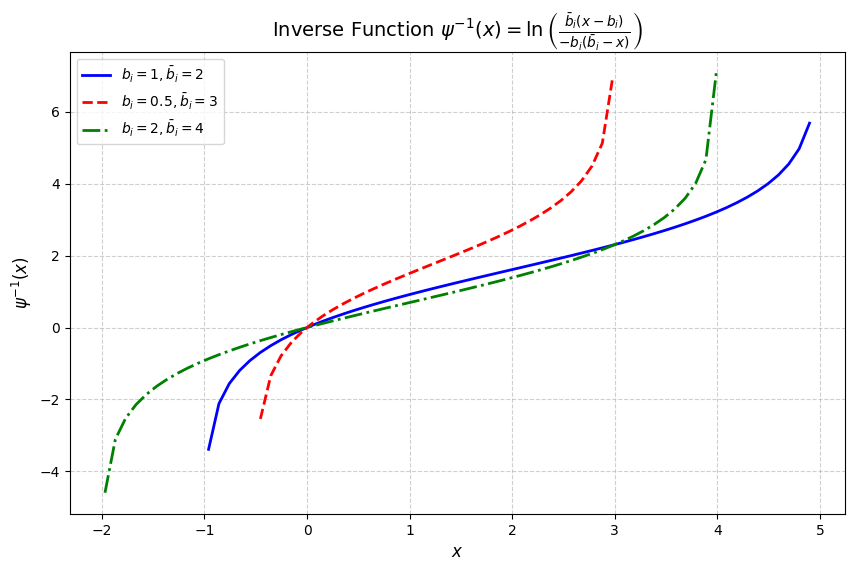

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def psi_inv(x, b_under, b_over):
    """计算 ψ^{-1}(x) = ln( (b_over*(x - b_under)) / (-b_under*(b_over - x)) )"""
    numerator = b_over * (x - b_under)
    denominator = -b_under * (b_over - x)
    return np.log(numerator / denominator)

# 定义 x 的范围（避免分母为 0）
x = np.linspace(-5, 5, 100)  # 从 -5 到 5，1000 个点

# 定义不同的参数组合
params = [
    {"b_under": -1.0, "b_over": 5.0, "label": r"${b}_i=1, \bar{b}_i=2$", "color": "blue", "linestyle": "-"},
    {"b_under": -0.5, "b_over": 3.0, "label": r"${b}_i=0.5, \bar{b}_i=3$", "color": "red", "linestyle": "--"},
    {"b_under": -2.0, "b_over": 4.0, "label": r"${b}_i=2, \bar{b}_i=4$", "color": "green", "linestyle": "-."},
]

plt.figure(figsize=(10, 6))

# 绘制每条曲线
for param in params:
    b_under, b_over = param["b_under"], param["b_over"]
    y = psi_inv(x, b_under, b_over)
    plt.plot(x, y, label=param["label"], color=param["color"], linestyle=param["linestyle"], linewidth=2)

# 添加图例、标签、网格等
plt.xlabel(r"$x$", fontsize=12)
plt.ylabel(r"$\psi^{-1}(x)$", fontsize=12)
plt.title(r"Inverse Function $\psi^{-1}(x) = \ln \left( \frac{\bar{b}_i (x - {b}_i)}{-{b}_i (\bar{b}_i - x)} \right)$", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(fontsize=10)

# # 调整 y 轴范围（可选）
# plt.ylim(-5, 5)  # 根据实际曲线调整

plt.show()


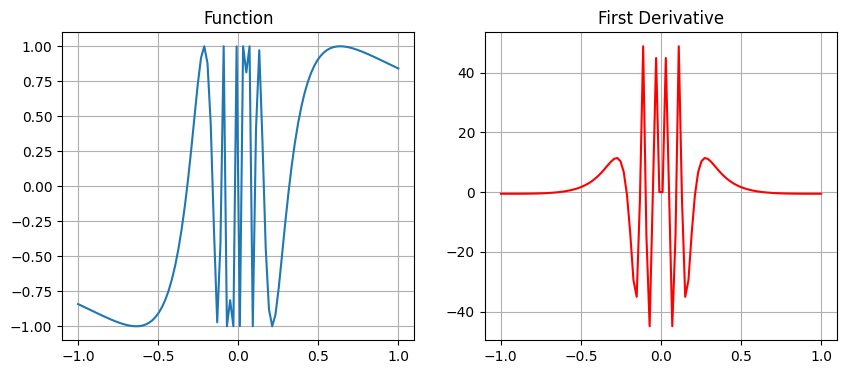

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def s_P(x):
    # return x**3  # 示例函数（满足 C¹）
    # return np.where(x < 0, x**3, x**3 + 2)  # 在x=0处跳跃+2
    # return np.where(x == 0, np.nan, x**3)  # x=1处无定义
    return np.where(x != 0, np.sin(1/x), 0)  # x=0时强制为0

x = np.linspace(-1, 1, 100)
y = s_P(x)
dy = np.gradient(y, x)  # 数值计算一阶导数

# 绘制函数和导数
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(x, y, label=r"$s^P(x)$")
plt.title("Function")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(x, dy, label=r"$\frac{ds^P}{dx}$", color="red")
plt.title("First Derivative")
plt.grid(True)

plt.show()
